In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble  import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
rf=RandomForestClassifier(random_state=1)
lr=LogisticRegression()
nb=MultinomialNB()
dt=DecisionTreeClassifier(random_state=0)

In [9]:
d_c =["moroccan","korean","japanese","vietnamese","brazilian","southern_us","british","cajun_creole","chinese","filipino","french","greek","indian","spanish","irish","russian","noroccan","italian","thai","mexican","jamaican"]
df=pd.read_json("C:\\Users\\Harshavardhan\\Downloads\\whats-cooking\\train.json\\train.json")

In [10]:
print(df["cuisine"].unique())
x=df['ingredients']
y=df['cuisine'].apply(d_c.index)

['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


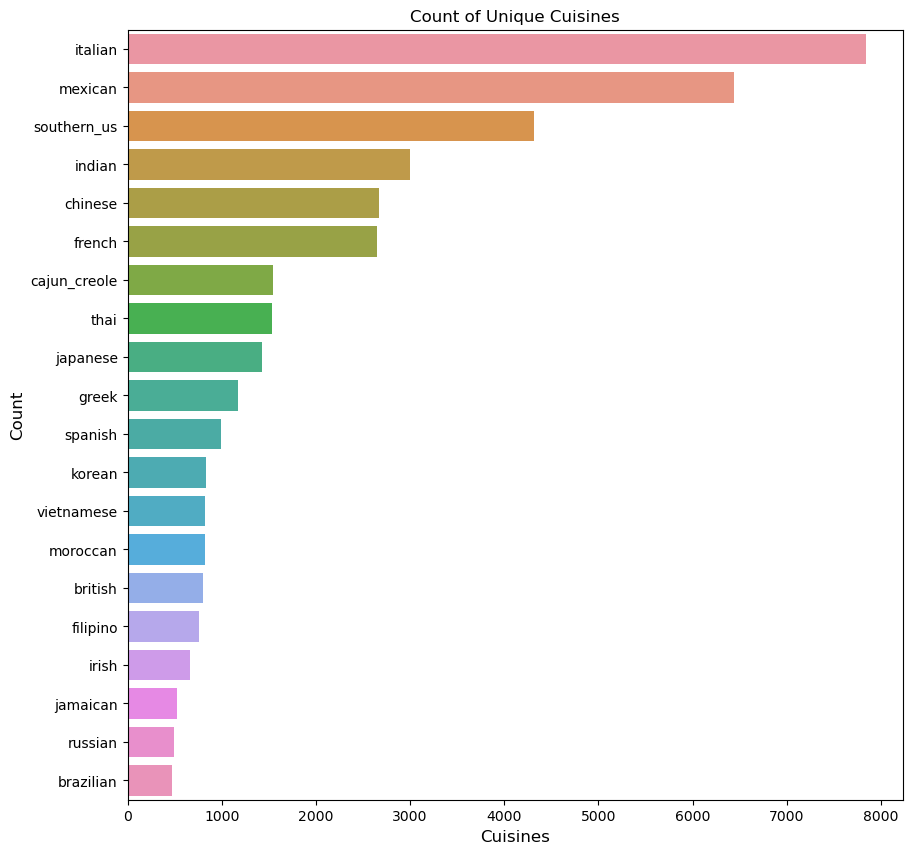

In [20]:
count_cuisine = df['cuisine'].value_counts(sort=True)
plt.figure(figsize=(10,10))
sns.barplot(y = count_cuisine.index, x = count_cuisine.values)
plt.title('Count of Unique Cuisines')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cuisines', fontsize=12)
plt.show()

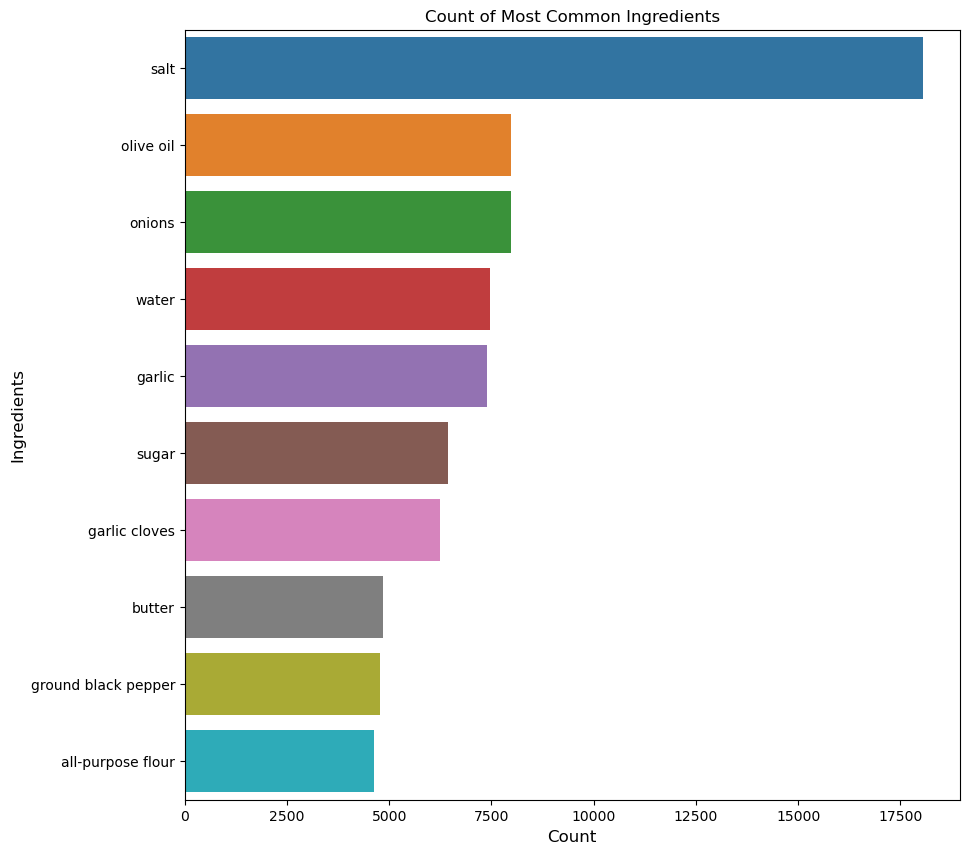

In [22]:
count_ingredients = []
for x in df['ingredients']:
    for y in x:
        count_ingredients.append(y)
count_ingredients = pd.Series(count_ingredients)
c_ingredients = count_ingredients.value_counts(sort=True).head(10)
plt.figure(figsize=(10,10))
sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
plt.title('Count of Most Common Ingredients')
plt.ylabel('Ingredients', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

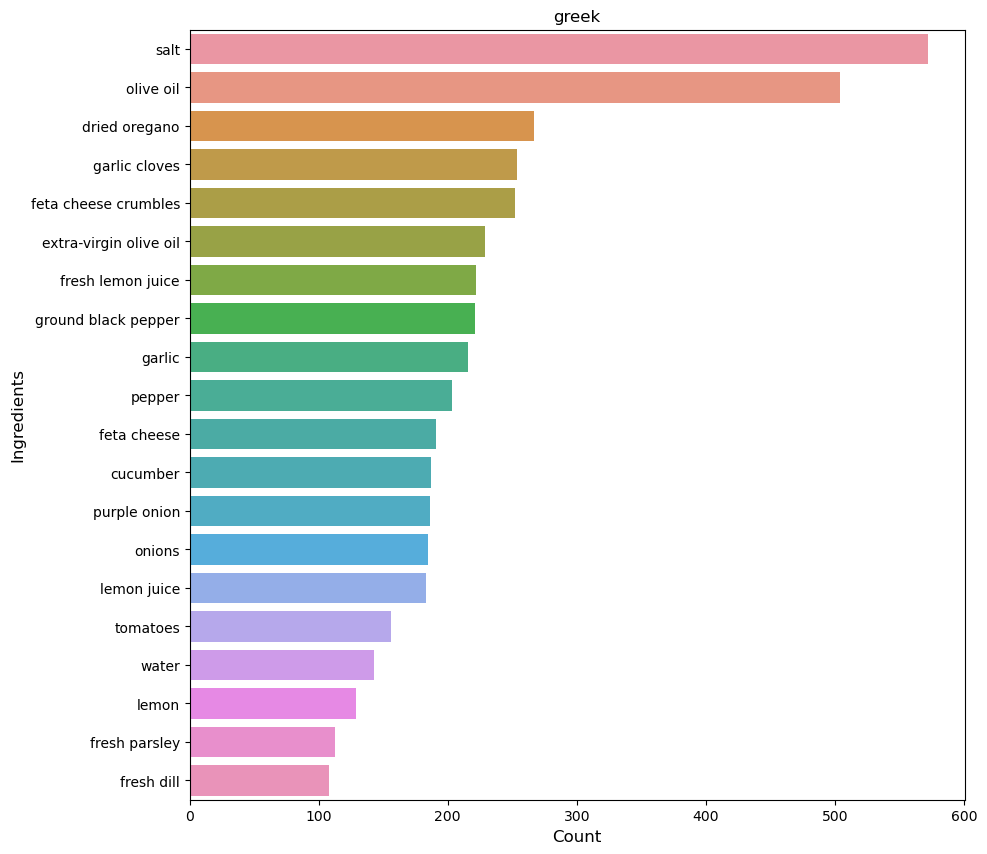

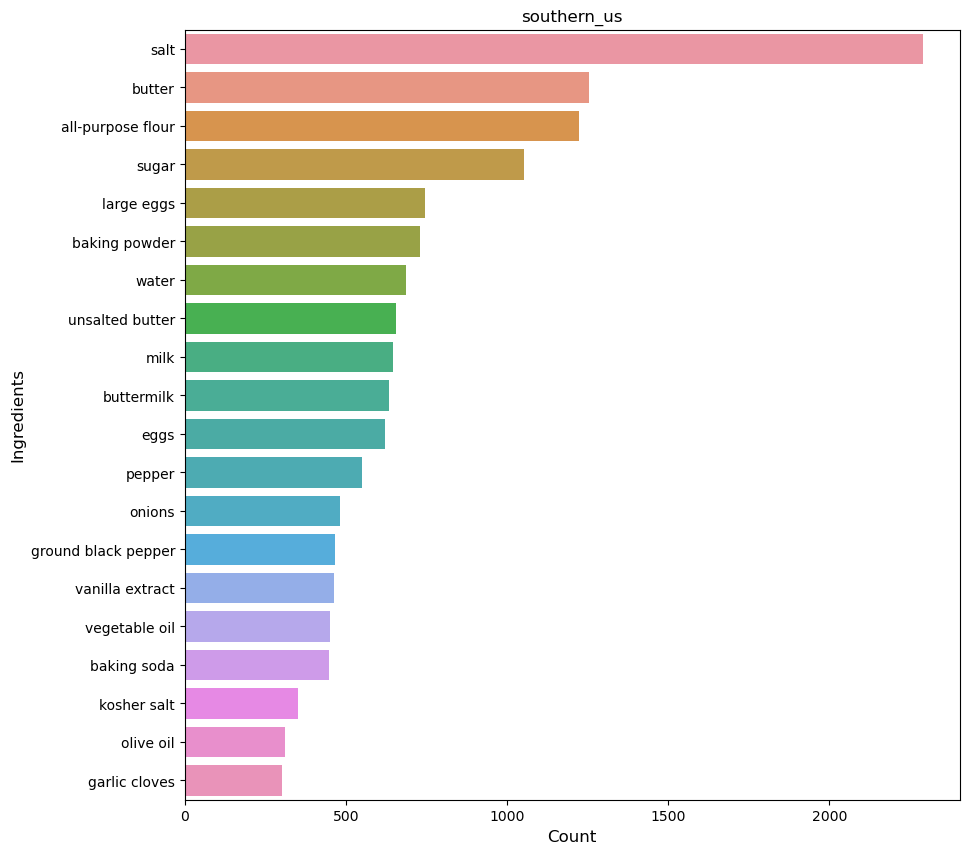

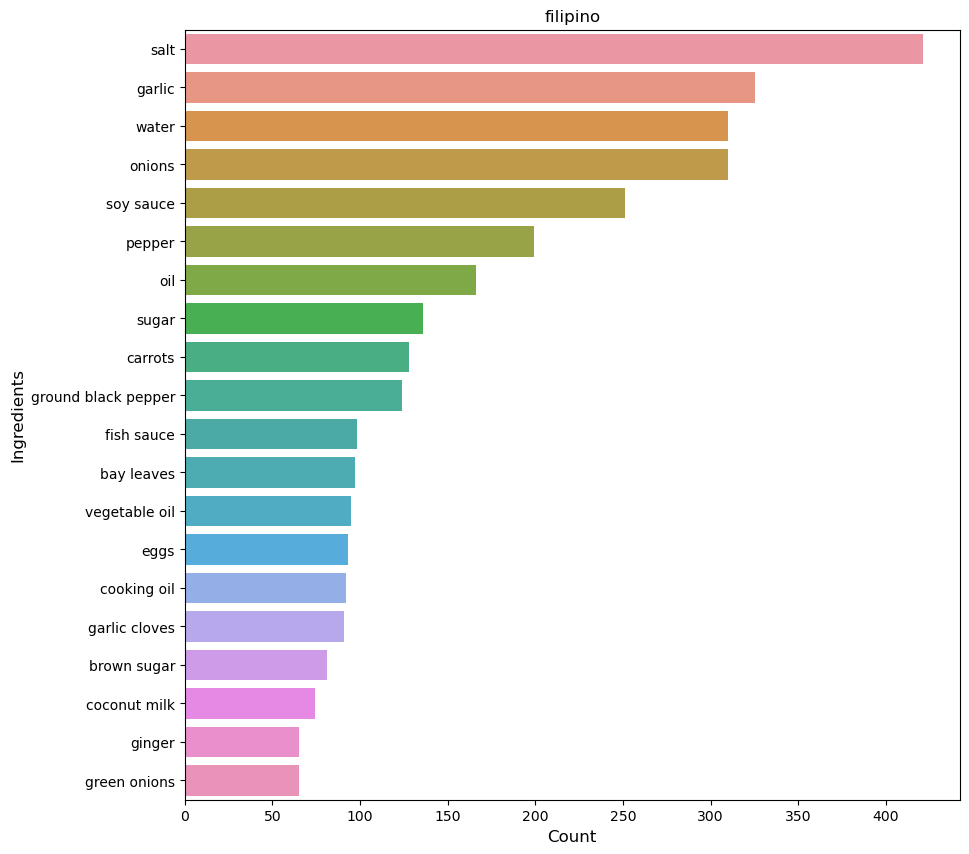

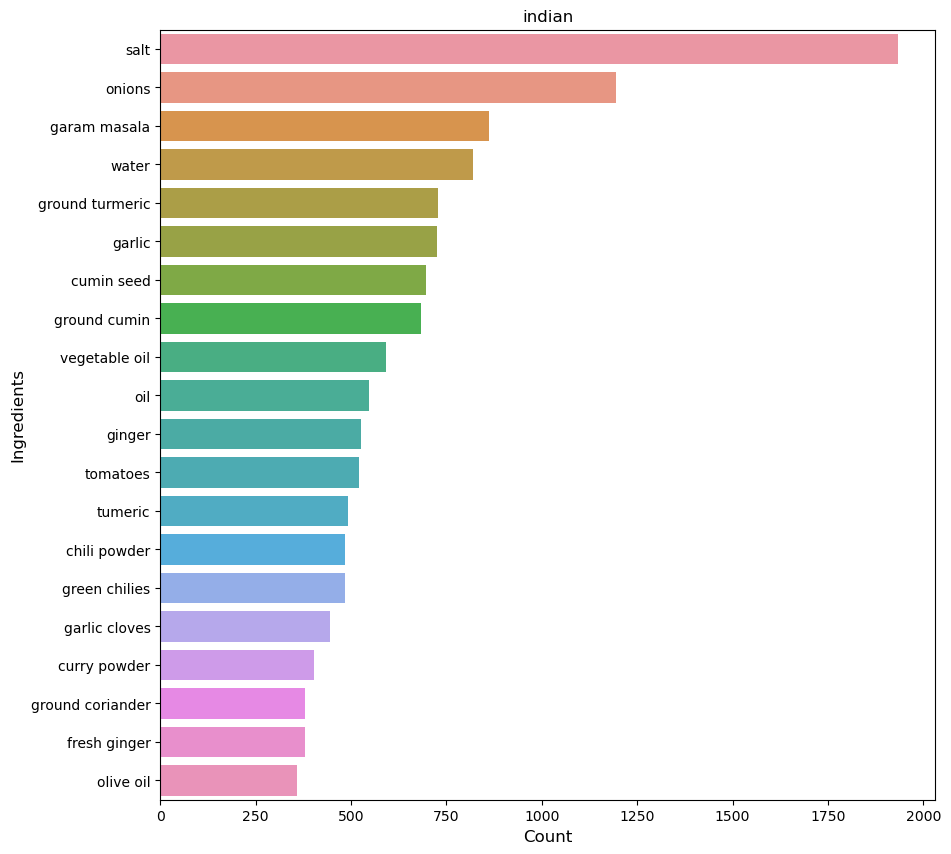

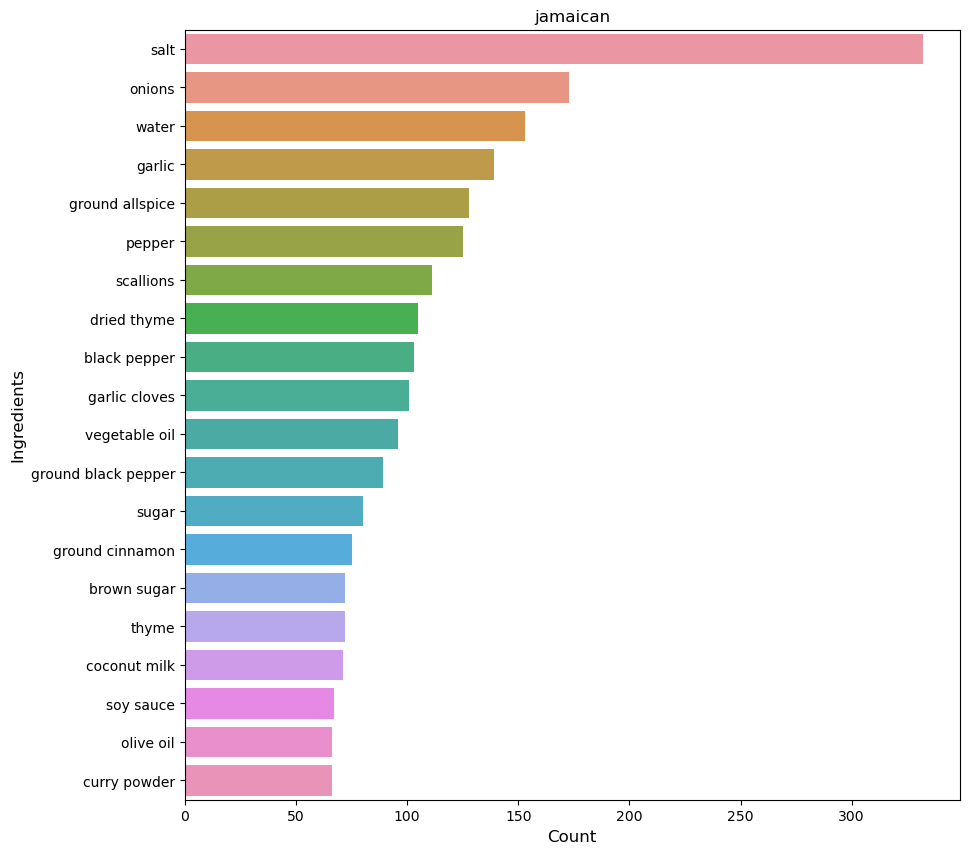

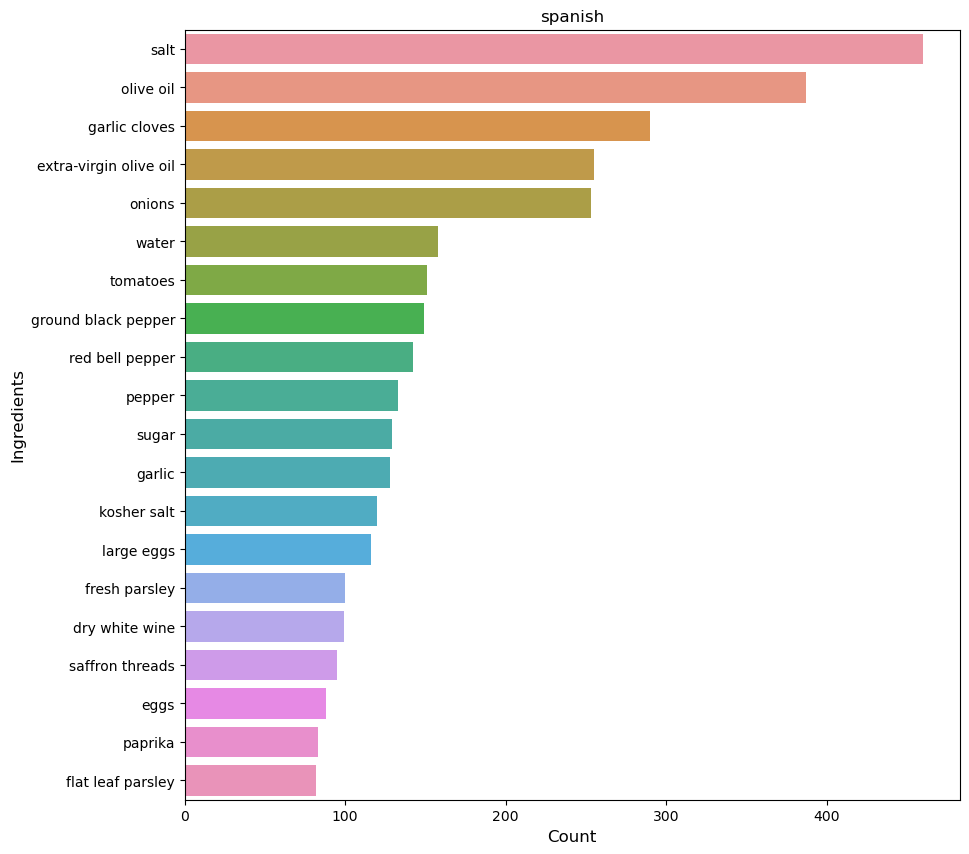

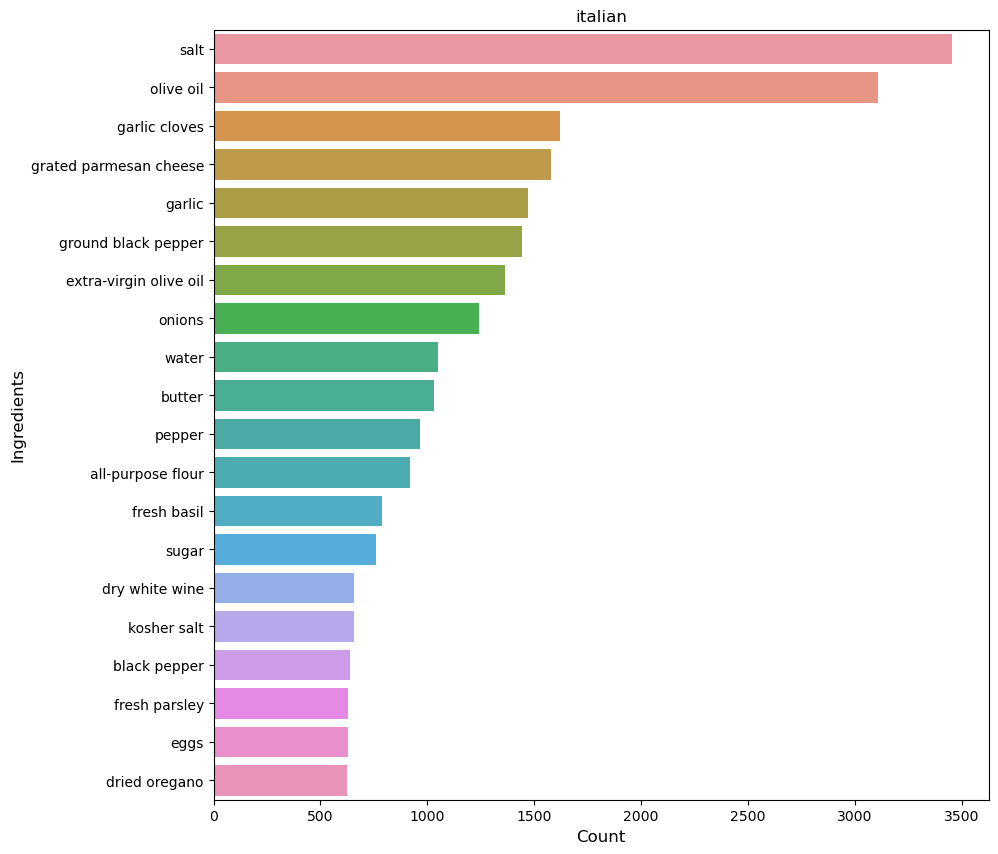

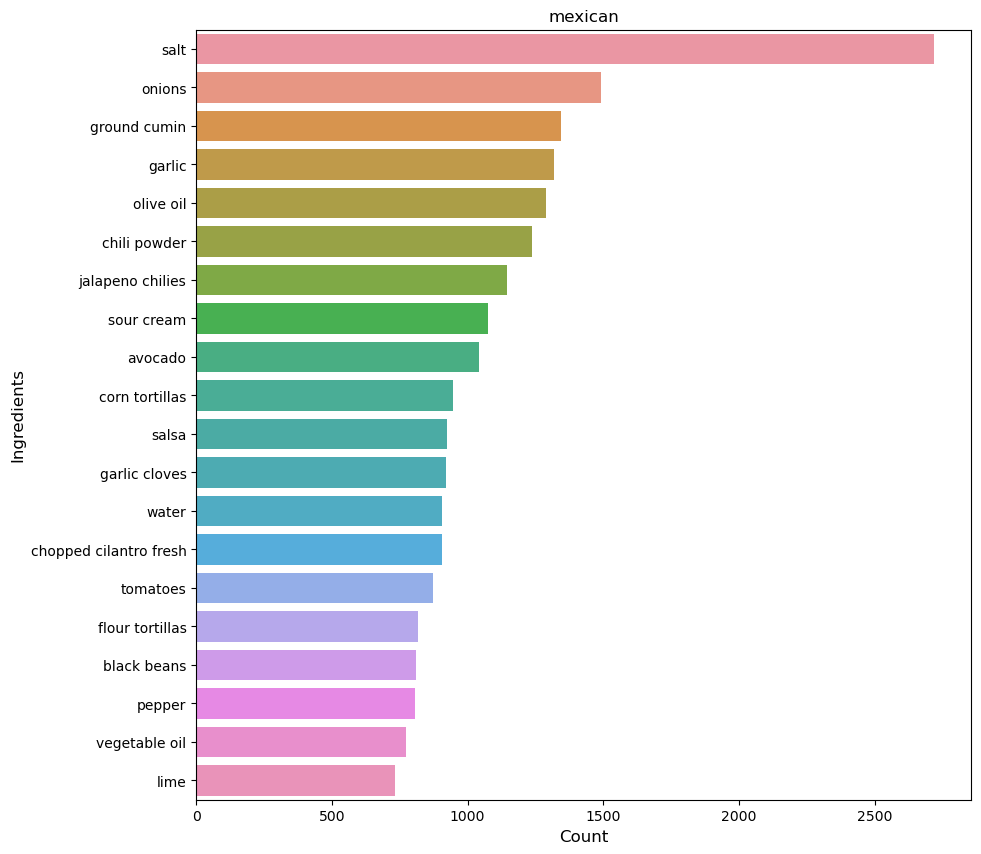

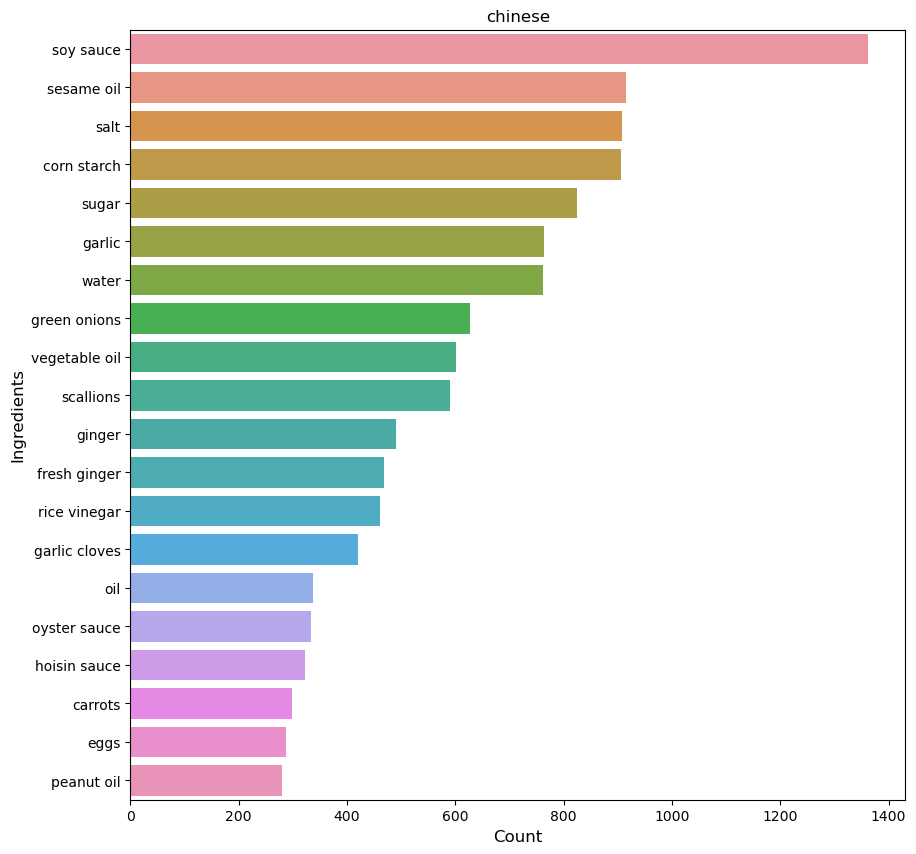

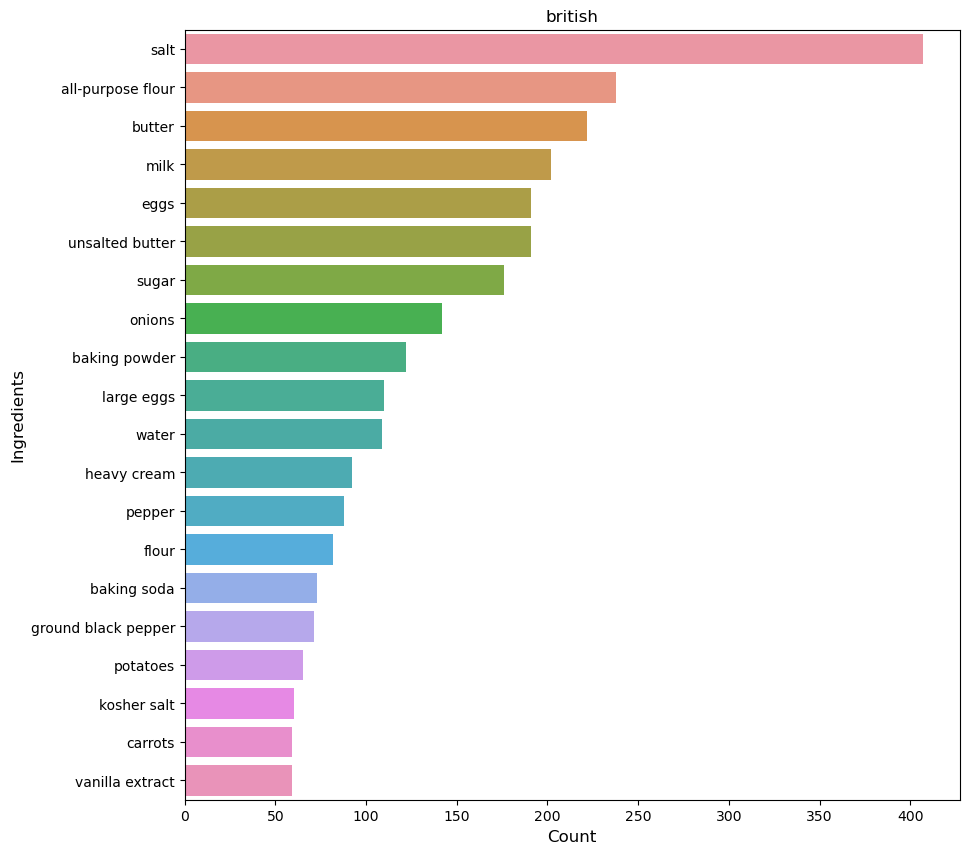

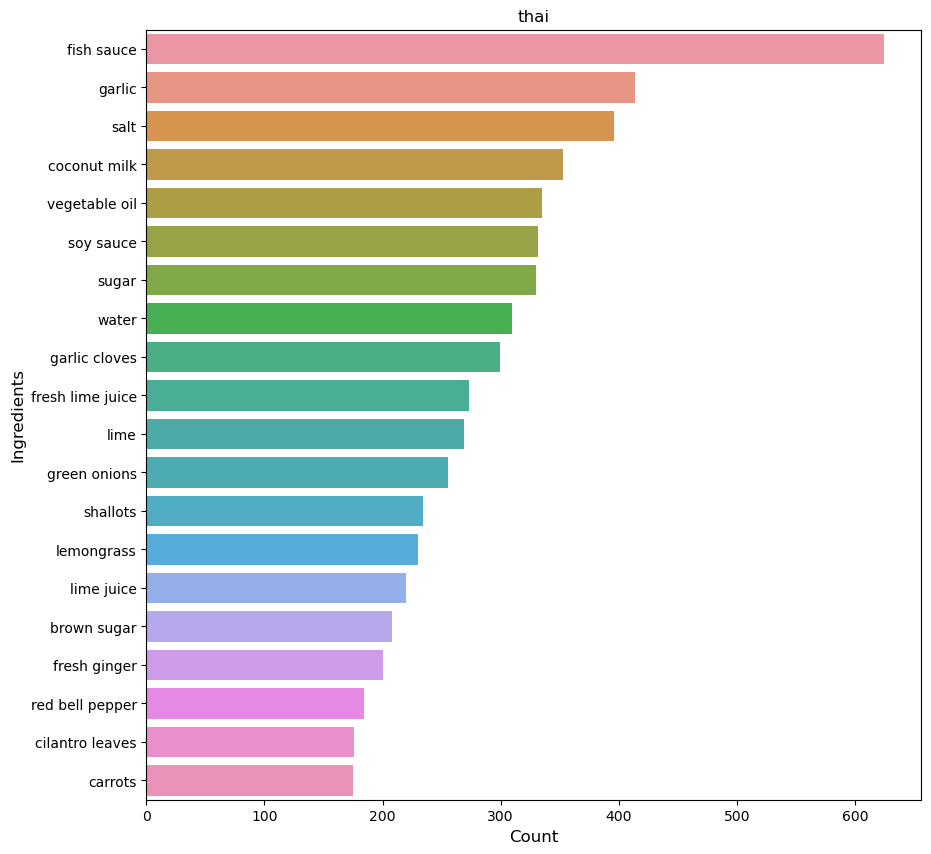

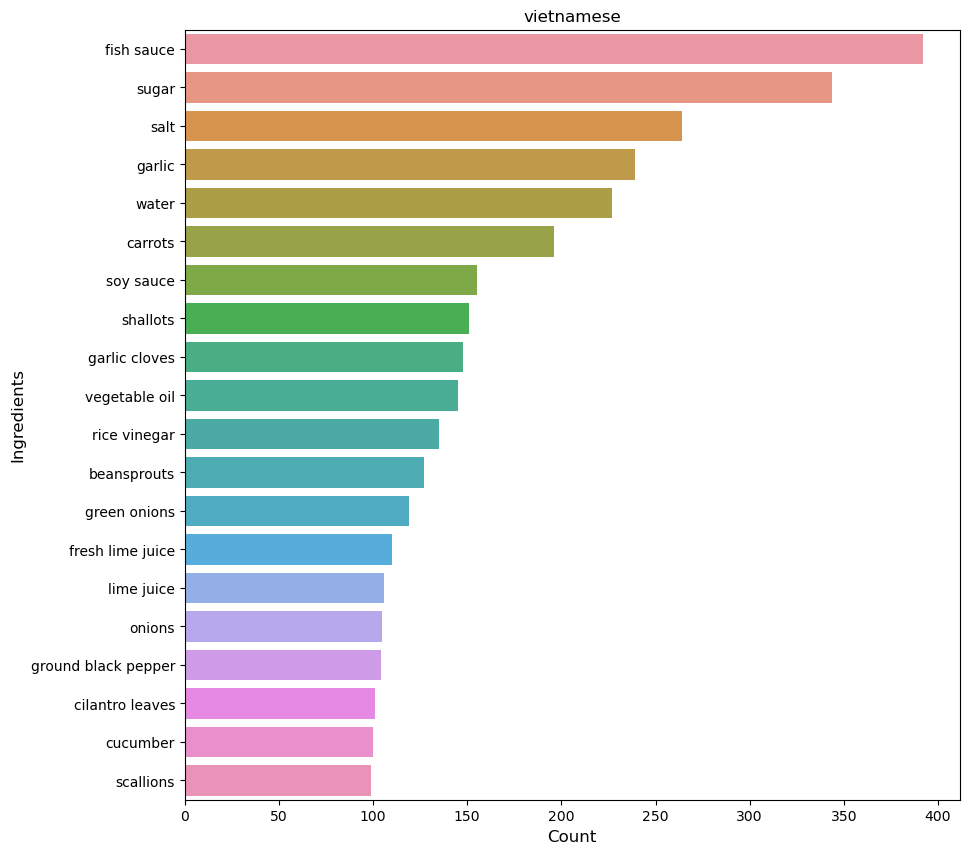

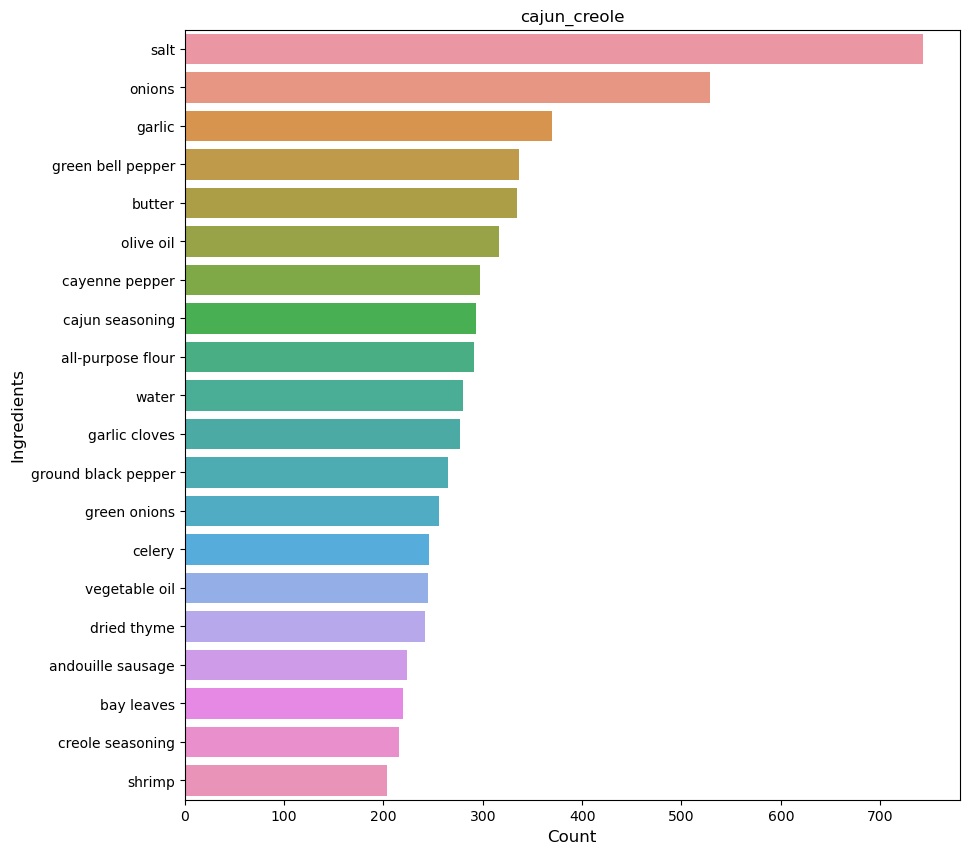

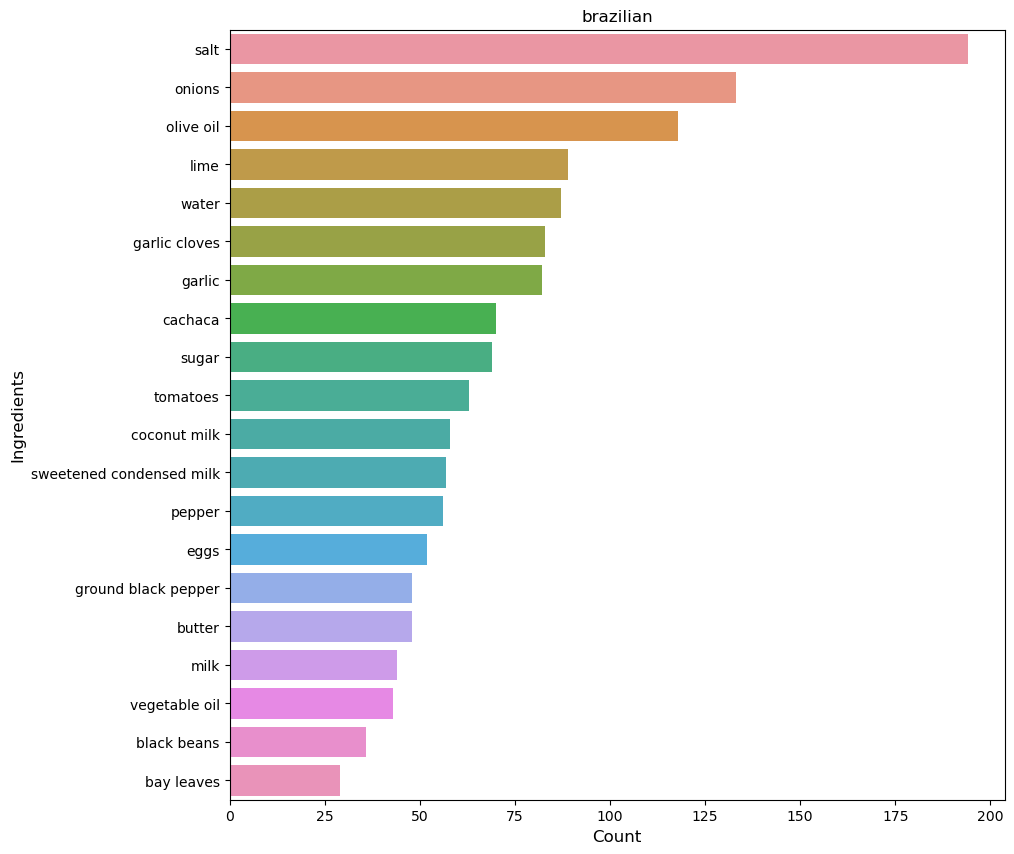

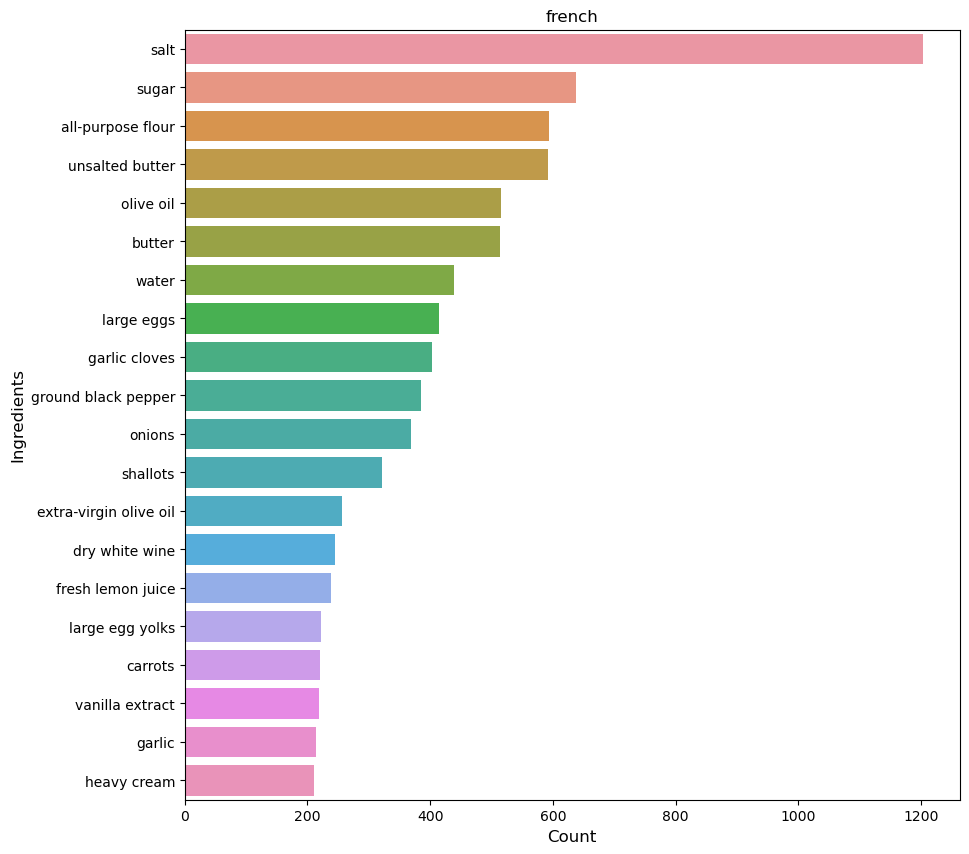

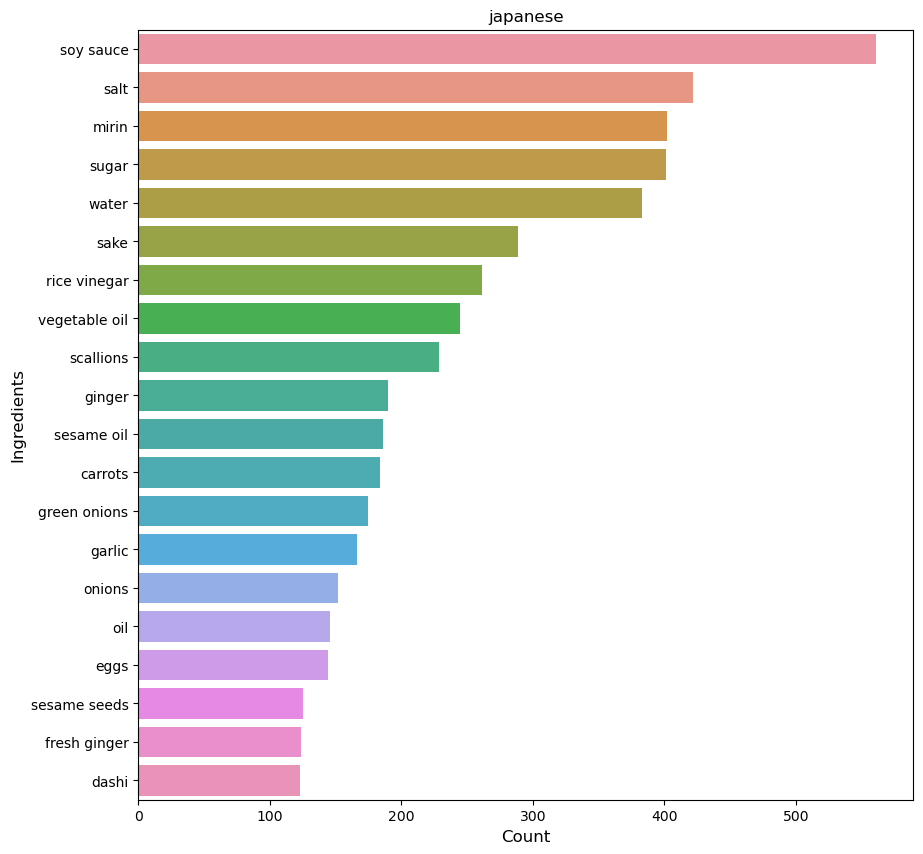

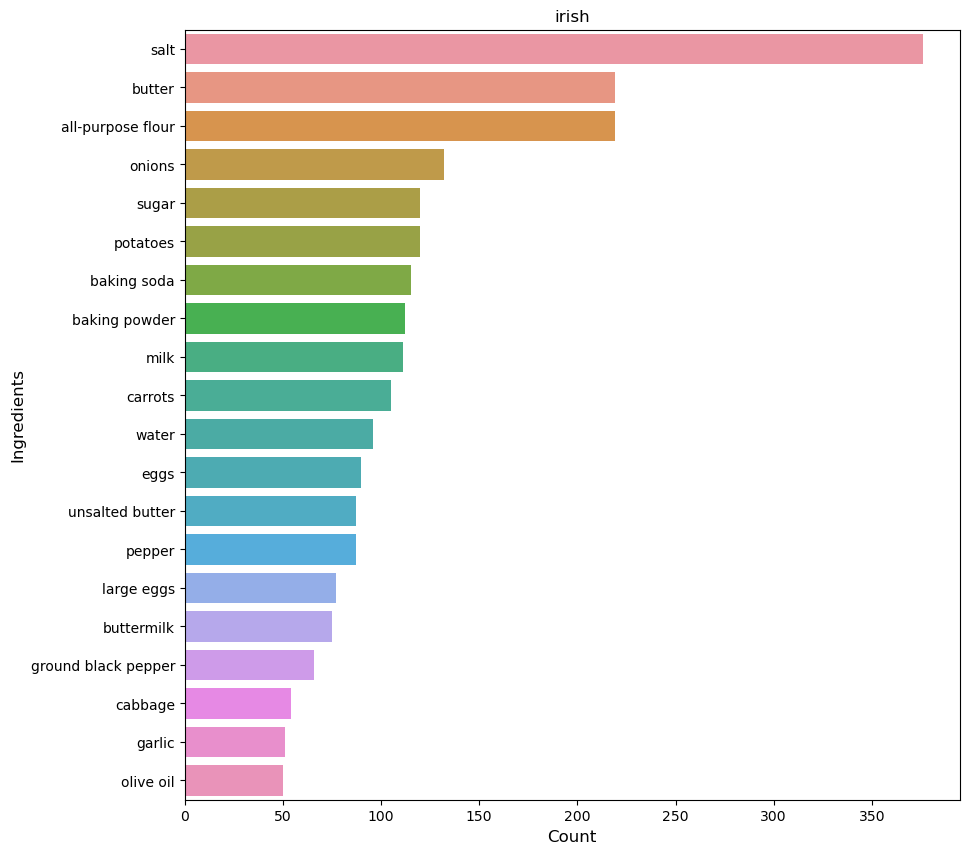

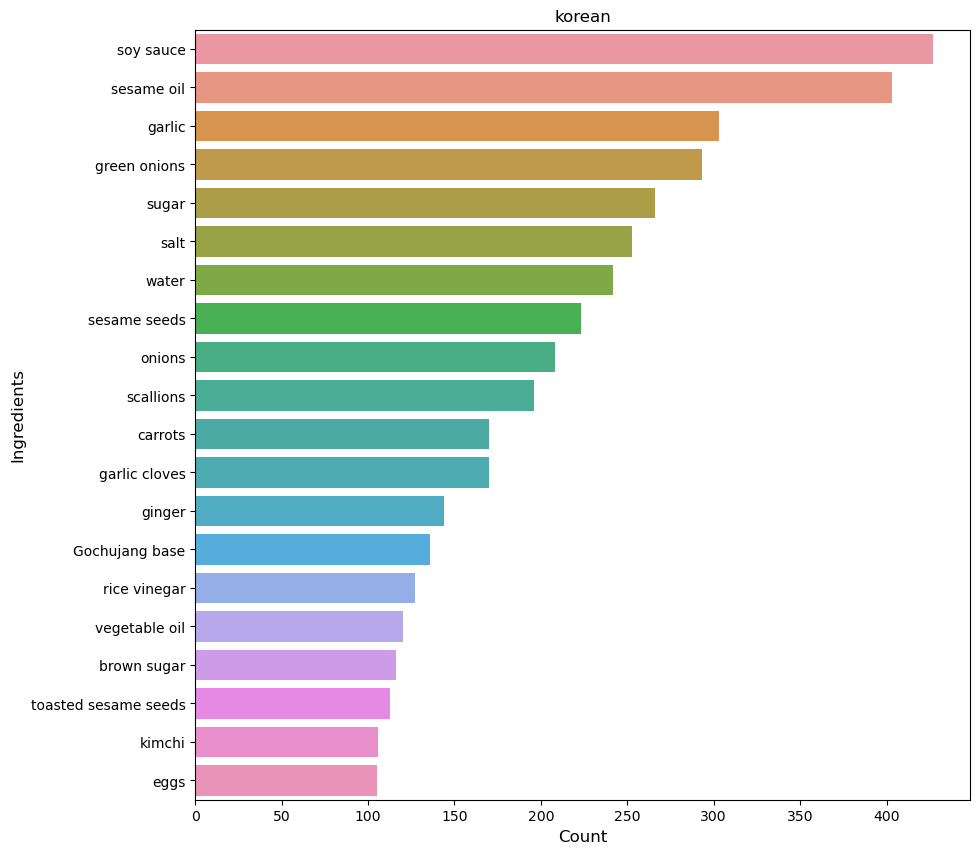

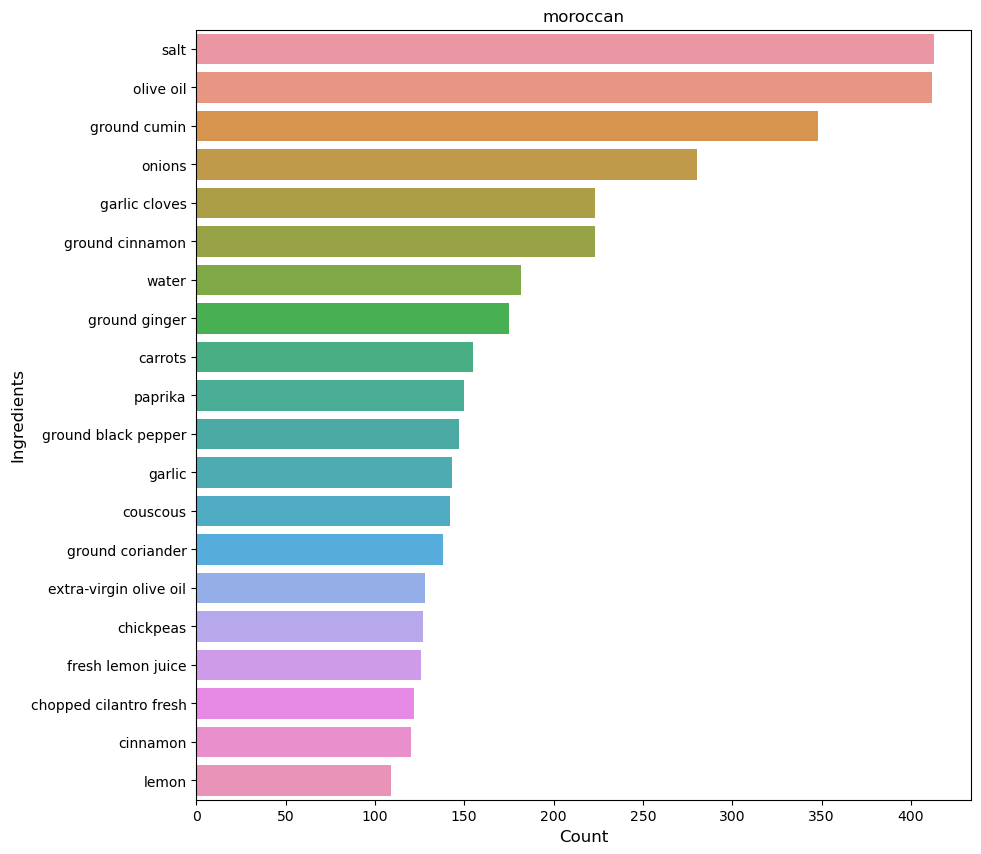

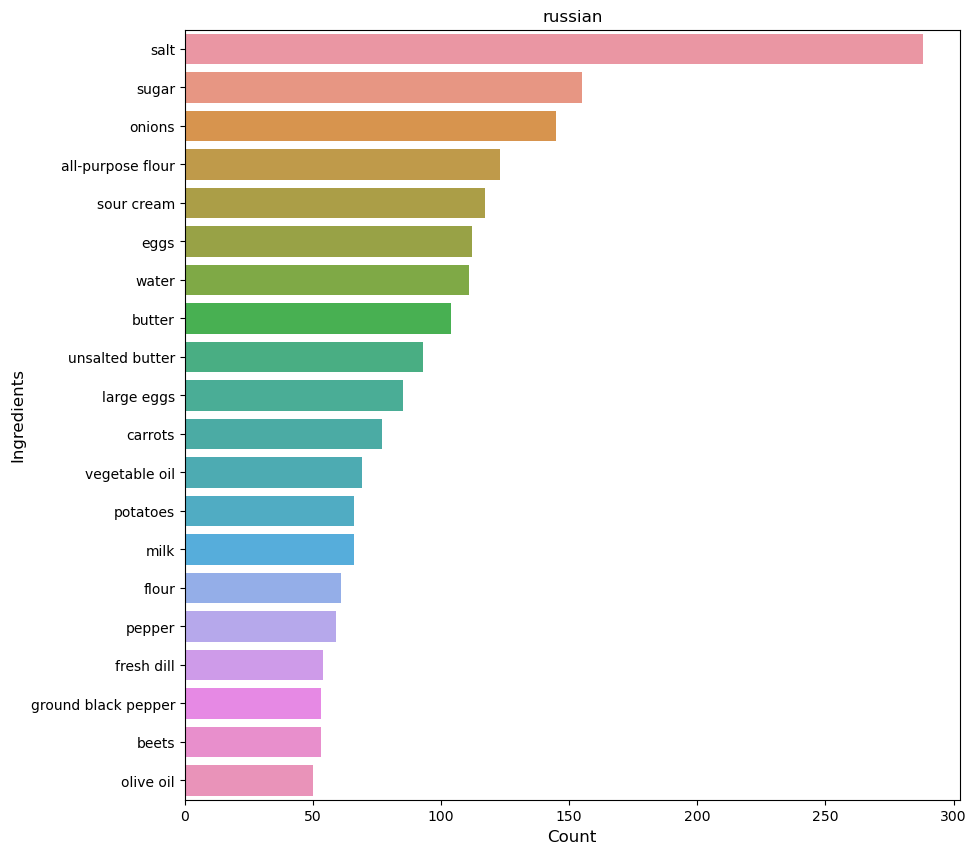

In [25]:
cuisines = df['cuisine'].unique()
for i in cuisines:
  ingredients=[]
  for j in df[df['cuisine']==i]['ingredients']:
    for k in j:
      ingredients.append(k)
  ingredients = pd.Series(ingredients)
  c_ingredients = ingredients.value_counts(sort=True).head(20)
  plt.figure(figsize=(10,10))
  sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
  plt.title(i)
  plt.ylabel('Ingredients', fontsize=12)
  plt.xlabel('Count', fontsize=12)
  plt.show()

In [11]:
df['all_ingredients']=df['ingredients'].map(";".join)
cv=CountVectorizer()
x=cv.fit_transform(df['all_ingredients'].values)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [13]:
rf.fit(X_train,y_train)
r_pred=rf.predict(X_test)

In [14]:
print("Random Forest:",accuracy_score(y_test,r_pred))

Random Forest: 0.7541272102572698
